In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pycaret
import matplotlib.pyplot as plt

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71556 entries, 0 to 71555
Data columns (total 35 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   index    71556 non-null  datetime64[ns]
 1   disk_id  71556 non-null  float64       
 2   n_5      71556 non-null  float64       
 3   r_5      71556 non-null  float64       
 4   n_9      71556 non-null  float64       
 5   r_9      71556 non-null  float64       
 6   n_12     71556 non-null  float64       
 7   r_12     71556 non-null  float64       
 8   n_177    71556 non-null  float64       
 9   r_177    71556 non-null  float64       
 10  n_180    71556 non-null  float64       
 11  r_180    71556 non-null  float64       
 12  n_181    71556 non-null  float64       
 13  r_181    71556 non-null  float64       
 14  n_182    71556 non-null  float64       
 15  r_182    71556 non-null  float64       
 16  n_183    71556 non-null  float64       
 17  r_183    71556 non-null  float6

In [4]:
data.columns

Index(['index', 'disk_id', 'n_5', 'r_5', 'n_9', 'r_9', 'n_12', 'r_12', 'n_177',
       'r_177', 'n_180', 'r_180', 'n_181', 'r_181', 'n_182', 'r_182', 'n_183',
       'r_183', 'n_184', 'r_184', 'n_187', 'r_187', 'n_190', 'r_190', 'n_194',
       'r_194', 'n_195', 'r_195', 'n_199', 'r_199', 'n_241', 'r_241', 'n_242',
       'r_242', 'label'],
      dtype='object')

In [3]:
data = pd.read_csv('../ssd_data/final_data/final_MB1.csv')
# 'index' 컬럼을 datetime 형태로 변환
data['index'] = pd.to_datetime(data['index'])
df = data.drop(['disk_id','index'],axis=1)

from pycaret.classification import *

train_df, test_df = train_test_split(df, test_size=0.2)
# PyCaret의 setup() 함수를 사용하여 환경 설정
cla_test_1 = setup(data=train_df, target='label', train_size= 0.8, fold=5)

# AutoML Classification 모델 훈련 및 비교
best_model = compare_models()

,Description,Value
0,Session id,6767
1,Target,label
2,Target type,Binary
3,Original data shape,"(57244, 33)"
4,Transformed data shape,"(57244, 33)"
5,Transformed train set shape,"(45795, 33)"
6,Transformed test set shape,"(11449, 33)"
7,Numeric features,32
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9937,0.9994,0.9519,0.9847,0.9680,0.9645,0.9647,1.0500
dt,Decision Tree Classifier,0.9920,0.9750,0.9538,0.9660,0.9598,0.9554,0.9554,0.1420
et,Extra Trees Classifier,0.9916,0.9992,0.9501,0.9658,0.9579,0.9532,0.9533,0.7600
lightgbm,Light Gradient Boosting Machine,0.9853,0.9976,0.8818,0.9697,0.9236,0.9155,0.9168,0.2340
knn,K Neighbors Classifier,0.9595,0.9616,0.7528,0.8298,0.7893,0.7670,0.7682,1.6800
gbc,Gradient Boosting Classifier,0.9459,0.9370,0.5155,0.9077,0.6572,0.6303,0.6603,2.4360
ada,Ada Boost Classifier,0.9197,0.8772,0.2583,0.8224,0.3926,0.3620,0.4330,0.6620
lr,Logistic Regression,0.8993,0.3855,0.0000,0.0000,0.0000,0.0000,0.0000,0.5720
dummy,Dummy Classifier,0.8993,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0500
ridge,Ridge Classifier,0.8991,0.0000,0.0015,0.1105,0.0030,0.0020,0.0088,0.0620


In [34]:
train_columns = ['label']
for i in train_df.columns:
    if i[0] == 'r':
        train_columns.append(i)
train_columns.remove('r_9')
train_columns.remove('r_242')
train_columns.remove('r_241')

In [35]:
train_columns

['label',
 'r_5',
 'r_12',
 'r_177',
 'r_180',
 'r_181',
 'r_182',
 'r_183',
 'r_184',
 'r_187',
 'r_190',
 'r_194',
 'r_195',
 'r_199']

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from pycaret.classification import *
train_df, test_df = train_test_split(df, test_size=0.2)

X = train_df[train_columns]
# y = train_df['label']
X_test = test_df[train_columns]
# y_test = test_df['label']

# PyCaret의 setup() 함수를 사용하여 환경 설정
cla_test_1 = setup(data=X, target='label', train_size= 0.8, fold=5)
best_model = compare_models()
# AutoML Classification 모델 훈련 및 비교
# best_model = compare_models()
# clf = RandomForestClassifier(random_state=42)
# clf.fit(X_,y)

,Description,Value
0,Session id,3289
1,Target,label
2,Target type,Binary
3,Original data shape,"(57244, 14)"
4,Transformed data shape,"(57244, 14)"
5,Transformed train set shape,"(45795, 14)"
6,Transformed test set shape,"(11449, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9722,0.9911,0.8318,0.8864,0.8582,0.8428,0.8433,0.7180
et,Extra Trees Classifier,0.9719,0.9871,0.8228,0.8917,0.8557,0.8402,0.8411,0.6260
dt,Decision Tree Classifier,0.9716,0.9707,0.8245,0.8875,0.8548,0.8391,0.8398,0.0520
knn,K Neighbors Classifier,0.9665,0.9773,0.8301,0.8380,0.8340,0.8154,0.8154,0.3960
lightgbm,Light Gradient Boosting Machine,0.9475,0.9803,0.5472,0.8931,0.6786,0.6518,0.6751,0.1920
gbc,Gradient Boosting Classifier,0.9146,0.8779,0.2247,0.7675,0.3473,0.3159,0.3857,1.0020
ada,Ada Boost Classifier,0.9022,0.8301,0.1302,0.5791,0.2122,0.1818,0.2413,0.3940
lda,Linear Discriminant Analysis,0.8999,0.6343,0.0157,0.8487,0.0309,0.0270,0.1058,0.0720
ridge,Ridge Classifier,0.8998,0.0000,0.0110,0.9750,0.0217,0.0195,0.0974,0.0580
dummy,Dummy Classifier,0.8987,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0600


In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57244 entries, 31808 to 36865
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   57244 non-null  float64
 1   r_5     57244 non-null  float64
 2   r_9     57244 non-null  float64
 3   r_12    57244 non-null  float64
 4   r_177   57244 non-null  float64
 5   r_180   57244 non-null  float64
 6   r_181   57244 non-null  float64
 7   r_182   57244 non-null  float64
 8   r_183   57244 non-null  float64
 9   r_184   57244 non-null  float64
 10  r_187   57244 non-null  float64
 11  r_190   57244 non-null  float64
 12  r_194   57244 non-null  float64
 13  r_195   57244 non-null  float64
 14  r_199   57244 non-null  float64
 15  r_241   57244 non-null  float64
 16  r_242   57244 non-null  float64
dtypes: float64(17)
memory usage: 9.9 MB


In [15]:
X.describe()

,label,r_5,r_9,r_12,r_177,r_180,r_181,r_182,r_183,r_184,r_187,r_190,r_194,r_195,r_199,r_241,r_242
count,57244.000000,57244.000000,57244.000000,57244.000000,57244.000000,57244.000000,57244.000000,57244.000000,57244.000000,57244.000000,57244.000000,57244.000000,57244.000000,57244.000000,57244.000000,5.724400e+04,5.724400e+04
mean,0.102124,1.273228,13533.263475,20.675017,174.615399,6518.797382,0.000664,0.087939,1.273228,0.000087,265.218189,29.141758,29.141688,265.218189,3.181547,4.925438e+11,3.562207e+11
std,0.302814,44.296863,3698.568942,13.823732,156.680991,56.958100,0.025756,8.403659,44.296863,0.009346,7752.561365,2.462613,2.462645,7752.561365,215.854800,5.082710e+11,3.578787e+11
min,0.000000,0.000000,1651.000000,3.000000,0.000000,3299.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,22.000000,0.000000,0.000000,0.000000e+00,2.195140e+05
25%,0.000000,0.000000,12938.000000,16.000000,37.000000,6501.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,27.000000,0.000000,0.000000,9.085112e+10,5.424894e+10
50%,0.000000,0.000000,14574.000000,18.000000,149.000000,6523.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,29.000000,0.000000,0.000000,3.679993e+11,2.927054e+11
75%,0.000000,0.000000,15928.000000,22.000000,278.000000,6543.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000,31.000000,0.000000,0.000000,7.531874e+11,5.604316e+11
max,1.000000,3192.000000,20338.000000,125.000000,882.000000,6606.000000,1.000000,1064.000000,3192.000000,1.000000,229624.000000,41.000000,41.000000,229624.000000,16479.000000,2.886767e+12,3.514336e+12


In [26]:
for i in list(X.columns):
    if X[i].nunique() < 5:
        print(i)

label
r_181
r_184


In [18]:
X[X['r_184']==1]

,label,r_5,r_9,r_12,r_177,r_180,r_181,r_182,r_183,r_184,r_187,r_190,r_194,r_195,r_199,r_241,r_242
51413,1.0,0.0,15304.0,14.0,197.0,6563.0,0.0,0.0,0.0,1.0,0.0,30.0,30.0,0.0,0.0,5.820949e+11,3.927725e+11
65034,1.0,0.0,9370.0,15.0,128.0,6569.0,0.0,0.0,0.0,1.0,0.0,30.0,30.0,0.0,0.0,3.933882e+11,2.949762e+11
47223,1.0,0.0,8372.0,14.0,139.0,6590.0,0.0,0.0,0.0,1.0,0.0,39.0,39.0,0.0,0.0,4.747688e+11,2.633609e+11
47224,1.0,0.0,8396.0,14.0,139.0,6590.0,0.0,0.0,0.0,1.0,0.0,33.0,33.0,0.0,0.0,4.748542e+11,2.638365e+11
64864,1.0,0.0,9562.0,15.0,119.0,6522.0,0.0,0.0,0.0,1.0,0.0,31.0,31.0,0.0,0.0,3.677375e+11,3.250244e+11


In [27]:
X[X['r_184']==1]['label'].value_counts()

1.0    5
Name: label, dtype: int64

In [29]:
prediction = predict_model(best_model, data = X_test)
from pycaret.utils import check_metric
check_metric(prediction['Purchase'], prediction['Label'], metric = 'Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9966,0.9997,0.9786,0.9885,0.9836,0.9816,0.9817


ImportError: cannot import name 'check_metric' from 'pycaret.utils' (/Users/parkjeongwon/miniforge3/lib/python3.10/site-packages/pycaret/utils/__init__.py)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

train_columns = []
for i in train_df.columns:
    if i[0] == 'r':
        train_columns.append(i)
X = train_df[train_columns]
y = train_df['label']
X_test = test_df[train_columns]
y_test = test_df['label']

clf = RandomForestClassifier(random_state=42)
clf.fit(X, y)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

y_pred = clf.predict(X_test)
print(f"Accuracy : {accuracy_score(y_test, y_pred)}")
print(f"Macro_f1_score : {f1_score(y_test, y_pred,average='macro')}")
print(f"Precision : {precision_score(y_test, y_pred)}")
print(f"Recall : {recall_score(y_test, y_pred)}")

Accuracy : 0.9960871995528228
Macro_f1_score : 0.9892167389827414
Precision : 0.9929873772791024
Recall : 0.9685362517099864


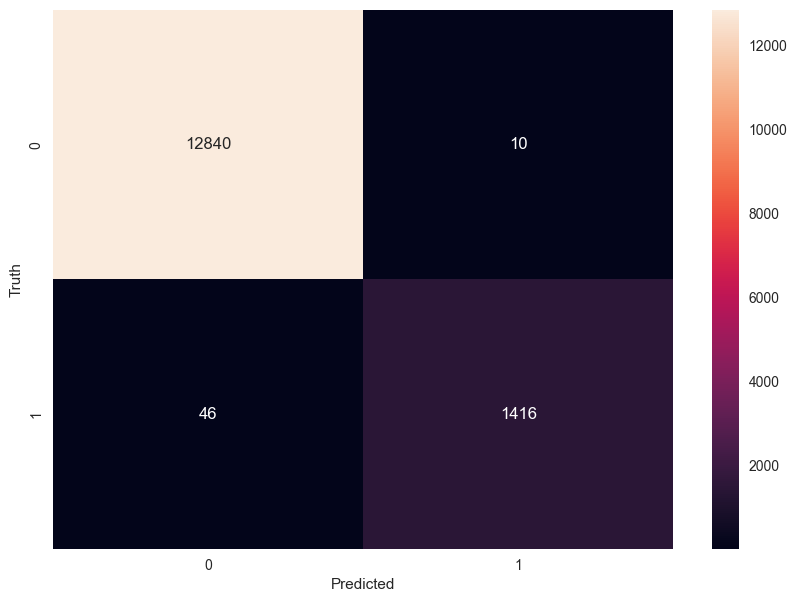

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

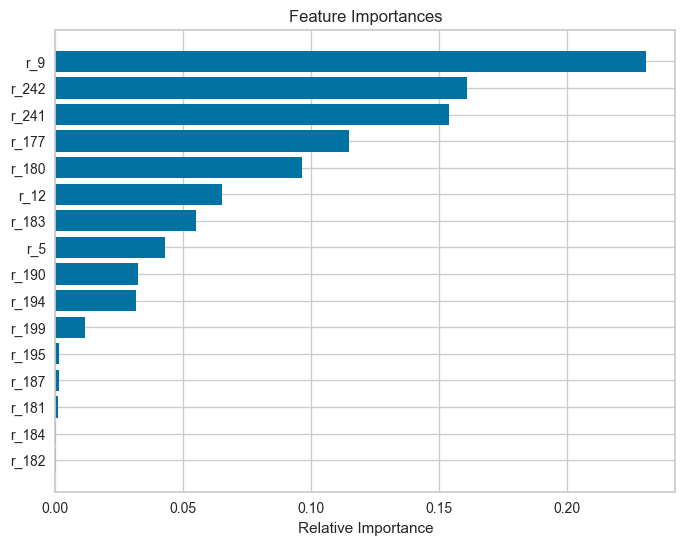

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# 특성 중요도
feature_importances = clf.feature_importances_

# 특성 중요도를 내림차순으로 정렬
indices = np.argsort(feature_importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [43]:
result = X_test.copy()
result['label'] = y_test
result['pred'] = y_pred
result.head(15)

,r_5,r_9,r_12,r_177,r_180,r_181,r_182,r_183,r_184,r_187,r_190,r_194,r_195,r_199,r_241,r_242,label,pred
62853,0.0,14241.0,18.0,223.0,6543.0,0.0,0.0,0.0,0.0,0.0,26.0,26.0,0.0,0.0,7.520740e+11,5.577720e+11,0.0,0.0
1786,0.0,15002.0,12.0,237.0,6526.0,0.0,0.0,0.0,0.0,0.0,31.0,31.0,0.0,0.0,4.717187e+11,2.998420e+11,0.0,0.0
33345,0.0,13692.0,12.0,11.0,6530.0,0.0,0.0,0.0,0.0,0.0,29.0,29.0,0.0,0.0,8.843278e+09,6.832846e+09,0.0,0.0
28085,0.0,6051.0,13.0,137.0,6497.0,0.0,0.0,0.0,0.0,0.0,30.0,30.0,0.0,0.0,4.161695e+11,2.171362e+11,0.0,0.0
4970,0.0,5324.0,23.0,46.0,6523.0,0.0,0.0,0.0,0.0,0.0,29.0,29.0,0.0,0.0,1.243289e+11,4.652962e+10,0.0,0.0
55116,2.0,15275.0,27.0,1.0,6523.0,0.0,0.0,2.0,0.0,0.0,37.0,37.0,0.0,0.0,4.384906e+09,4.673628e+08,0.0,0.0
69038,0.0,12289.0,29.0,1.0,6533.0,0.0,0.0,0.0,0.0,0.0,25.0,25.0,0.0,0.0,2.650580e+09,2.741829e+11,0.0,0.0
41786,0.0,14920.0,16.0,187.0,6444.0,0.0,0.0,0.0,0.0,0.0,26.0,26.0,0.0,0.0,5.734335e+11,3.710167e+11,0.0,0.0
62262,0.0,14221.0,18.0,227.0,6553.0,0.0,0.0,0.0,0.0,0.0,27.0,27.0,0.0,0.0,7.494278e+11,5.775470e+11,0.0,0.0
42156,0.0,17192.0,16.0,208.0,6541.0,0.0,0.0,0.0,0.0,0.0,30.0,30.0,0.0,0.0,5.872761e+11,5.091664e+11,0.0,0.0


In [62]:
crit = result.describe().loc['mean','r_9']
test = result[result['r_9'] < crit]
test.sort_values(by='r_9').to_csv('시간 작은거.csv')

In [69]:
# 정규성 검정
from scipy.stats import shapiro
data0 = result[result['label']==0]['r_9']
data1 = result[result['label']==1]['r_9']
normal0 = shapiro(data0)
normal1 = shapiro(data1)
print(normal0, normal1)

ShapiroResult(statistic=0.8594217300415039, pvalue=0.0) ShapiroResult(statistic=0.8799249529838562, pvalue=3.58142771553941e-32)
